In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import cv2
from os import listdir
from os.path import isfile, join
import string
import re
import nltk
from keras import layers
from keras import Input
from keras.models import Model
from keras import models

In [ ]:
#Deep Learning Packages
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [ ]:
#Dataset Preparation
import json
import pandas as pd

path = '/content/drive/MyDrive/ALDA_project/Training_dataset/'
testing_path = '/content/drive/MyDrive/ALDA_project/test_set/'

# LOAD THE DATASET
train_df = pd.read_csv(path + 'devset_images_gt.csv')
train_df.columns=(['image_id', 'label'])
train_df["image_id"] = train_df["image_id"].astype(str)

test_df = pd.read_csv(testing_path + 'testset_images_gt.csv')
test_df.columns=(['image_id', 'label'])
test_df["image_id"] = test_df["image_id"].astype(str)

train_df = train_df[train_df.columns[[0, 1]]]
test_df = test_df[test_df.columns[[0, 1]]] 

print("Training data\n", train_df.head())
print("\n")
print("Sample_Image\n ",train_df.iloc[1])

Training data
      image_id  label
0  4896119055      0
1  3468473862      0
2  4120853942      0
3  4436083254      0
4  4687941690      0


Sample_Image
  image_id    3468473862
label                0
Name: 1, dtype: object


In [ ]:
dim = (224, 224)
X_image_train = []
y_train = []

train_image_path = path + 'devset_images/'
for index,row in train_df.iterrows():
    try:
      fpath = os.path.join(train_image_path, row['image_id']+'.jpg')
      im = cv2.imread(fpath)
      im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      X_image_train.append(im_resized)
      y_train.append(row['label'])
    except:
          print('File not found. Check the name of file. ', row[0])

File not found. Check the name of file.  3458255758
File not found. Check the name of file.  5968047189
File not found. Check the name of file.  4355060977
File not found. Check the name of file.  9892658854
File not found. Check the name of file.  8238634118
File not found. Check the name of file.  7370874908
File not found. Check the name of file.  12175187445
File not found. Check the name of file.  3246368752
File not found. Check the name of file.  2583620603
File not found. Check the name of file.  9740979005
File not found. Check the name of file.  4421805350
File not found. Check the name of file.  8334177117
File not found. Check the name of file.  6627602249
File not found. Check the name of file.  4206386916
File not found. Check the name of file.  8090836475


In [ ]:
dim = (224, 224)
X_image_test = []
y_test = []
nf_test = []

test_image_path = testing_path + 'testset_images/'
for index,row in test_df.iterrows():
    try:
      fpath = os.path.join(test_image_path, row['image_id']+'.jpg')
      im = cv2.imread(fpath)
      im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      X_image_test.append(im_resized)
      y_test.append(row['label'])
    except:
          print('File not found. Check the name of file. ', row[0])
          nf_test.append(str(row[0]))
X_image_test = np.array(X_image_test)
y_test       = np.array(y_test)
X_image_train = np.array(X_image_train)
y_train       = np.array(y_train)

File not found. Check the name of file.  5847540163
File not found. Check the name of file.  9567943158


In [ ]:
import json
import pandas as pd

path = '/content/drive/MyDrive/ALDA_project/Training_dataset/'
testing_path = '/content/drive/MyDrive/ALDA_project/test_set/'

#Load the training dataset using metadata and label data.
train_df = pd.read_csv(path + 'devset_images_gt.csv')
train_df.columns=(['image_id', 'label'])
train_df["image_id"] = train_df["image_id"].astype(str)
train_df = train_df[train_df.columns[[0, 1]]]

json_filename = path + "devset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
print(json_df.head())
#merge label and json dataframes
train_df = pd.merge(train_df, json_df, how='inner')
train_df.head()


#Load the testing dataset using metadata and label data.
test_df = pd.read_csv(testing_path + 'testset_images_gt.csv')
test_df.columns=(['image_id', 'label'])
test_df["image_id"] = test_df["image_id"].astype(str)
test_df = test_df[test_df.columns[[0, 1]]]

json_filename = testing_path + "testset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
#merge label and json dataframes
test_df = pd.merge(test_df, json_df, how='inner')
test_df.head()

nf_train = ['3458255758','5968047189','4355060977','9892658854','8238634118','7370874908','12175187445','3246368752','2583620603','9740979005','4421805350','8334177117','6627602249','4206386916','8090836475']

train_df = train_df[~train_df['image_id'].isin(nf_train)]
test_df = test_df[~test_df['image_id'].isin(nf_test)]
train_df = train_df.drop(columns=['user_tags','image_id'])
test_df = test_df.drop(columns=['user_tags','image_id'])
train_df = train_df.fillna(" ")
test_df = test_df.fillna(" ")

X_text_train = train_df[['description', 'title']]
y_text_train = train_df['label'].tolist()
X_text_test = test_df[['description', 'title']]
y_text_test = test_df['label'].tolist()

                                         description  ...                   title
0                                               None  ...         Biltmore Estate
1                                               None  ...             Chand Minar
2  After the flood, the boarded up stores bear up...  ...      Uplifting Graffiti
3                                               None  ...                DSCF6487
4                                               None  ...  Oconoe river - flooded

[5 rows x 4 columns]


In [ ]:
#Generating the images feature vector using Inception
from tensorflow.keras.applications import InceptionV3
from keras.layers import Bidirectional, BatchNormalization
image_input = Input(shape=(224, 224, 3), name='image')
inception = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))(image_input)
x = layers.Flatten()(inception) 
x = layers.Dense(256, activation='relu')(x)
x = BatchNormalization()(x)

In [ ]:
!pip install bert-for-tf2

In [ ]:
#Pre-trained layer for BERT
from keras.layers import Bidirectional, BatchNormalization
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tqdm import tqdm
import numpy as np
from collections import namedtuple

bert_layer_1=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)
bert_layer_2=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)

MAX_SEQ_LEN=128
input_word_ids_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids_1")
input_mask_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask_1")
segment_ids_1 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids_1")

pooled_output_1, sequence_output_1 = bert_layer_1([input_word_ids_1, input_mask_1, segment_ids_1])

input_word_ids_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids_2")
input_mask_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask_2")
segment_ids_2 = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids_2")
pooled_output_2, sequence_output_2 = bert_layer_2([input_word_ids_2, input_mask_2, segment_ids_2])

In [ ]:
#One hot encoding for the label
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.fit_transform(y_test['label'])


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [ ]:
y_text_train = label_encoder.fit_transform(y_text_train)
y_text_train = to_categorical(y_text_train)

In [ ]:
#Tokenization for textual data
FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file=bert_layer_1.resolved_object.vocab_file.asset_path.numpy()

do_lower_case=bert_layer_1.resolved_object.do_lower_case.numpy()

tokenizer_1=FullTokenizer(vocab_file,do_lower_case)

FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file=bert_layer_2.resolved_object.vocab_file.asset_path.numpy()

do_lower_case=bert_layer_2.resolved_object.do_lower_case.numpy()

tokenizer_2=FullTokenizer(vocab_file,do_lower_case)

def get_masks(tokens, max_seq_length):
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))
def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens,)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def create_single_input(sentence,tokenizer,MAX_LEN):
  
  stokens = tokenizer.tokenize(sentence)
  
  stokens = stokens[:MAX_LEN]
  
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
 
  ids = get_ids(stokens, tokenizer, MAX_SEQ_LEN)
  masks = get_masks(stokens, MAX_SEQ_LEN)
  segments = get_segments(stokens, MAX_SEQ_LEN)

  return ids,masks,segments

def create_input_array(sentences,tokenizer):

  input_ids, input_masks, input_segments = [], [], []

  for sentence in tqdm(sentences,position=0, leave=True):
  
    ids,masks,segments=create_single_input(sentence,tokenizer,MAX_SEQ_LEN-2)

    input_ids.append(ids)
    input_masks.append(masks)
    input_segments.append(segments)

  return [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]

In [ ]:
inputs_1=create_input_array(train_df['description'], tokenizer_1)
inputs_2=create_input_array(train_df['title'], tokenizer_2)

100%|██████████| 5264/5264 [00:00<00:00, 10848.98it/s]


In [ ]:
inputs_1_test=create_input_array(test_df['description'], tokenizer_1)
inputs_2_test=create_input_array(test_df['title'], tokenizer_2)

100%|██████████| 1317/1317 [00:00<00:00, 10562.67it/s]


In [ ]:
#Binary feature Extraction
def addBinaryFeatures(df):
  descr_flooded = []
  user_tags_flooded = []
  title_flooded = []
  for row in df.itertuples():
    if(df.at[row.Index,'description'] is not None and "flood" in df.at[row.Index,'description']):
      descr_flooded.append(1)
    else:
      descr_flooded.append(0)
    if(df.at[row.Index,'title'] is not None and "flood" in df.at[row.Index,'title']):
      title_flooded.append(1)
    else:
      title_flooded.append(0)
    if(df.at[row.Index,'user_tags'] is not None and "flood" in df.at[row.Index,'user_tags']):
      user_tags_flooded.append(1)
    else:
      user_tags_flooded.append(0)

  df['descr_flooded'] = descr_flooded
  df['title_flooded'] = title_flooded
  df['user_tags_flooded'] = user_tags_flooded
  return df

In [ ]:
import json
import pandas as pd

path = '/content/drive/MyDrive/ALDA_project/Training_dataset/'
testing_path = '/content/drive/MyDrive/ALDA_project/test_set/'

#Load the training dataset using metadata and label data.
train_df_bf = pd.read_csv(path + 'devset_images_gt.csv')
train_df_bf.columns=(['image_id', 'label'])
train_df_bf["image_id"] = train_df_bf["image_id"].astype(str)
train_df_bf = train_df_bf[train_df_bf.columns[[0, 1]]]

json_filename = path + "devset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
print(json_df.head())
#merge label and json dataframes
train_df_bf = pd.merge(train_df_bf, json_df, how='inner')
train_df_bf.head()


#Load the testing dataset using metadata and label data.
test_df_bf = pd.read_csv(testing_path + 'testset_images_gt.csv')
test_df_bf.columns=(['image_id', 'label'])
test_df_bf["image_id"] = test_df_bf["image_id"].astype(str)
test_df_bf = test_df_bf[test_df_bf.columns[[0, 1]]]

json_filename = testing_path + "testset_images_metadata.json"
with open(json_filename) as json_file:
    data = json.load(json_file)

required_columns = ['description', 'user_tags', 'image_id', 'title']
json_df = pd.DataFrame(data['images'], columns = required_columns)
#merge label and json dataframes
test_df_bf = pd.merge(test_df_bf, json_df, how='inner')
test_df_bf.head()

nf_train = ['3458255758','5968047189','4355060977','9892658854','8238634118','7370874908','12175187445','3246368752','2583620603','9740979005','4421805350','8334177117','6627602249','4206386916','8090836475']

train_df_bf = train_df_bf[~train_df_bf['image_id'].isin(nf_train)]
test_df_bf = test_df_bf[~test_df_bf['image_id'].isin(nf_test)]

train_df_bf = addBinaryFeatures(train_df_bf)
train_x_bf = train_df_bf[['descr_flooded', 'title_flooded', 'user_tags_flooded']]
train_y_bf = train_df_bf[['label']]

test_df_bf = addBinaryFeatures(test_df_bf)
test_x_bf = test_df_bf[['descr_flooded', 'title_flooded', 'user_tags_flooded']]
test_y_bf = test_df_bf[['label']]


                                         description  ...                   title
0                                               None  ...         Biltmore Estate
1                                               None  ...             Chand Minar
2  After the flood, the boarded up stores bear up...  ...      Uplifting Graffiti
3                                               None  ...                DSCF6487
4                                               None  ...  Oconoe river - flooded

[5 rows x 4 columns]


In [ ]:
#Multimodal Initialization
concat_embeddings = Concatenate()([sequence_output_1, sequence_output_2])
bd_layer = (Bidirectional(LSTM(128)))(concat_embeddings)
bd_layer = BatchNormalization()(bd_layer)
input_3 = Input(shape=(3,))
bn_bf = BatchNormalization()(input_3)
concat_layer = Concatenate()([x, bd_layer, bn_bf])
dense_layer_fin = Dense(10, activation='relu')(concat_layer)
out = Dense(2, activation='softmax')(dense_layer_fin)
model_bf = tf.keras.models.Model(
      inputs=[image_input, [input_word_ids_1, input_mask_1, segment_ids_1],[input_word_ids_2, input_mask_2, segment_ids_2], input_3], outputs=out)

In [ ]:
base_learning_rate = 0.001
model_bf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

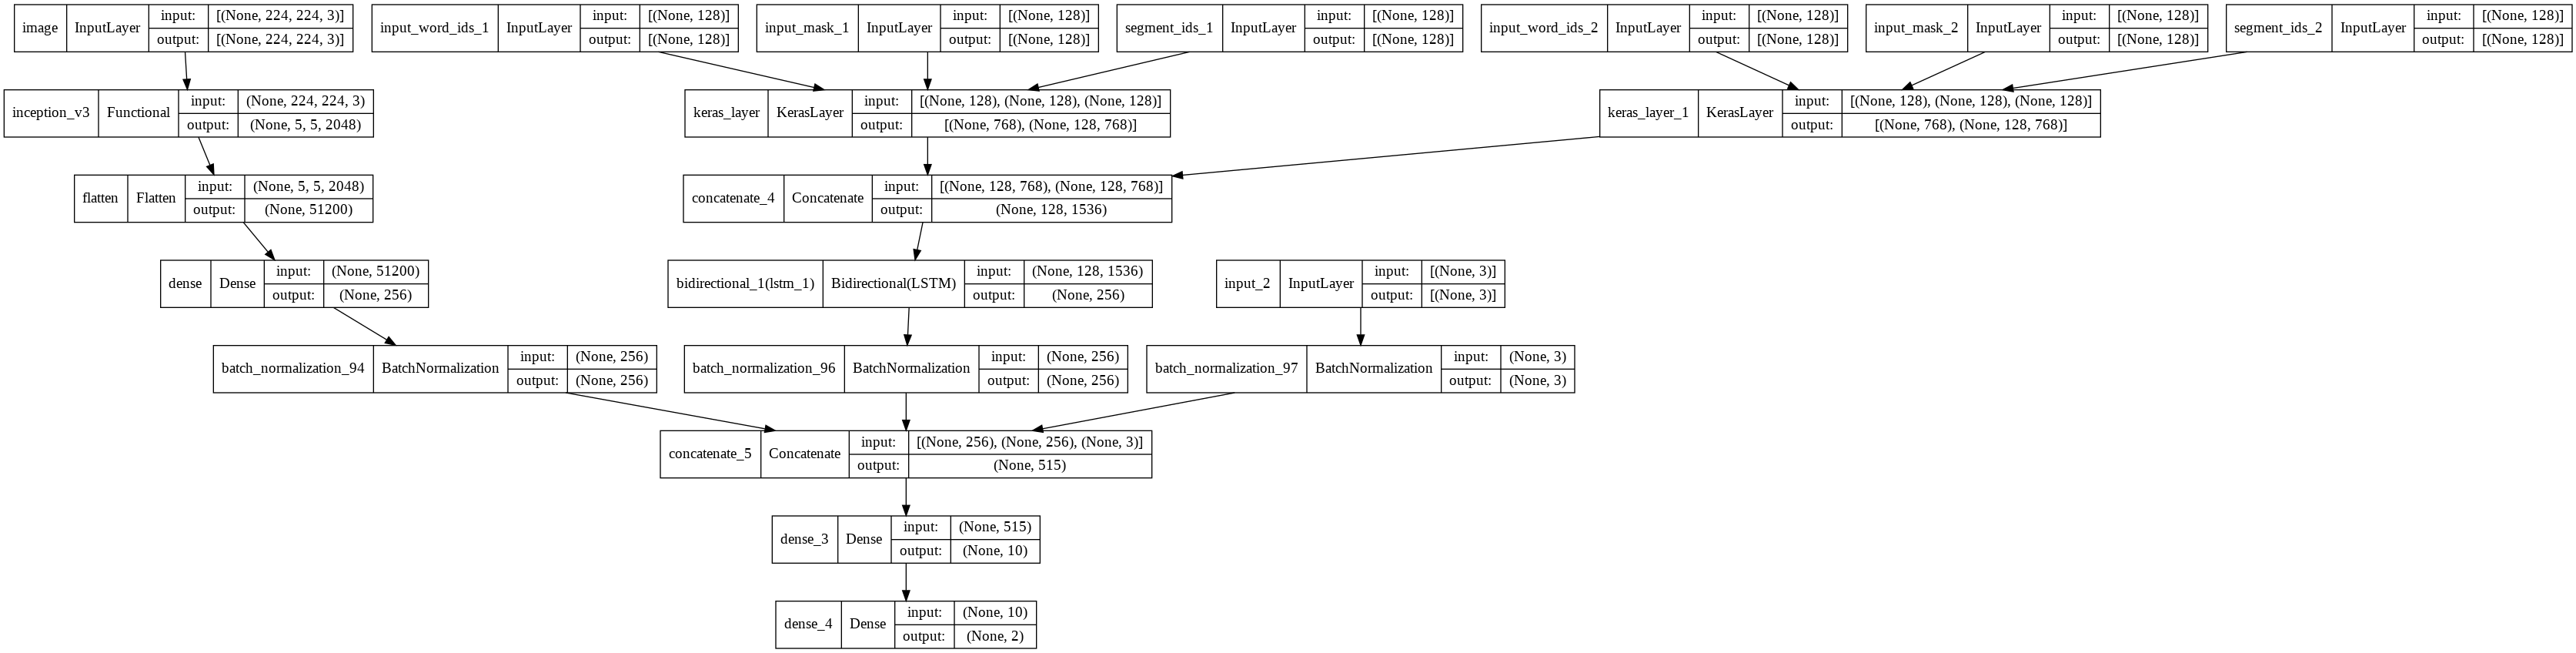

In [ ]:
#Multimodal architecture
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model_bf, to_file=dot_img_file, show_shapes=True)

In [ ]:
#Model Training
model_bf.fit([X_image_train,inputs_1, inputs_2, train_x_bf],y_train,epochs=15 ,batch_size=32,validation_split=0.1,shuffle=True)

Epoch 1/3
149/149 [==============================] - 77s 517ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 5.7754 - val_accuracy: 0.7780
Epoch 2/3
149/149 [==============================] - 77s 517ms/step - loss: 0.0633 - accuracy: 0.9747 - val_loss: 18.6873 - val_accuracy: 0.7761
Epoch 3/3
149/149 [==============================] - 77s 517ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 3.1314 - val_accuracy: 0.7951


In [ ]:
#Evaluating the model
y_pred1 = model_bf.predict([X_image_test, inputs_1_test, inputs_2_test, test_x_bf])
y_pred = np.argmax(y_pred1, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       839
           1       0.83      0.84      0.84       478

    accuracy                           0.88      1317
   macro avg       0.87      0.87      0.87      1317
weighted avg       0.88      0.88      0.88      1317



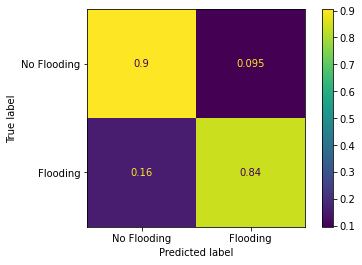

In [ ]:
#Confusion matrix for the model
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Flooding', 'Flooding'])
disp.plot()